<a href="https://colab.research.google.com/github/anafarida1992/MarketingAnalytics-CustomerSegmentation/blob/main/MarketingAnalytics_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.color_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/drive/MyDrive/DataAnalytics/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# **Exploratory Data Analysis (EDA)**



## **1. Data Quality**

a. Apakah data type tidak sesuai?

b. Apakah ada duplicates, missing values, outliers?

c. Apakah distribusi tidak sesuai?

### **a. Mengetahui data type**

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(col, dtype)
    print(df[col].unique())
  print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

**Kesimpulan : ada data type yang tidak sesuai yaitu pada column**

1.    Income = data type berupa object harus diubah menjadi float (terdapat whitespace pada nama kolom)

2.   Dt_Customer = data type berupa object harus diubah menjadi date

**Menghilangkan whitespace**

In [ ]:
df.columns=df.columns.str.replace(' ','')

**Mengecheck column Income apakah masih ada white space atau tidak**

In [ ]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

**Menghilangkan dollar sign dan koma pada data di column Income**

In [ ]:
df['Income']=df['Income'].str.replace('$','')
df['Income']=df['Income'].str.replace(',','')

**Mengubah Income menjadi data type float**

In [ ]:
df['Income']=df['Income'].astype('float')

**Mengubah Dt_Customer menjadi data type datetime**

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

###**b. Mengetahui ada tidaknya duplicate**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [ ]:
df.duplicated().sum()

0

**Kesimpulan : Tidak ada duplicate data**

### **c. Mengetahui ada tidaknya missing values**

In [ ]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

**Missing values dapat diisi dengan nilai mean/median dengan mempertimbangkan distribusi**

**Cara mengetahui distribusi:**

<Axes: xlabel='Income'>

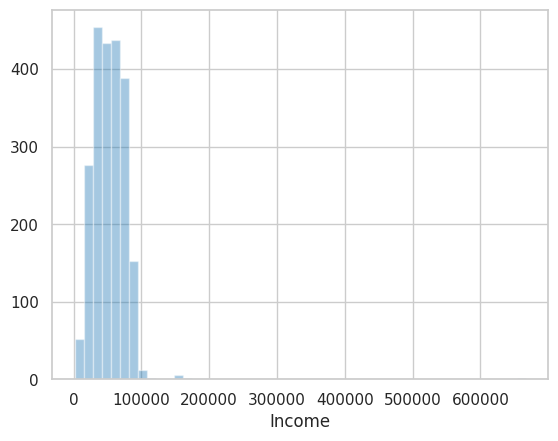

In [ ]:
sns.distplot(df['Income'], kde=False, hist=True)

<Axes: >

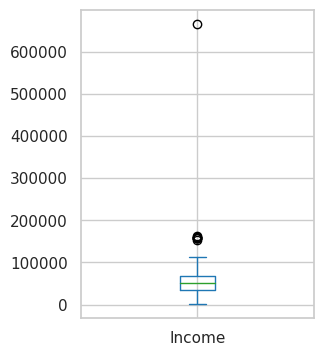

In [ ]:
df['Income'].plot(kind='box', figsize=(3,4))

**Mengisi nilai median ke dalam missing values pada column Income**

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].median())

#### **Mengetahui outliers**

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [ ]:
df_to_plot=df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain'],
        inplace=True)

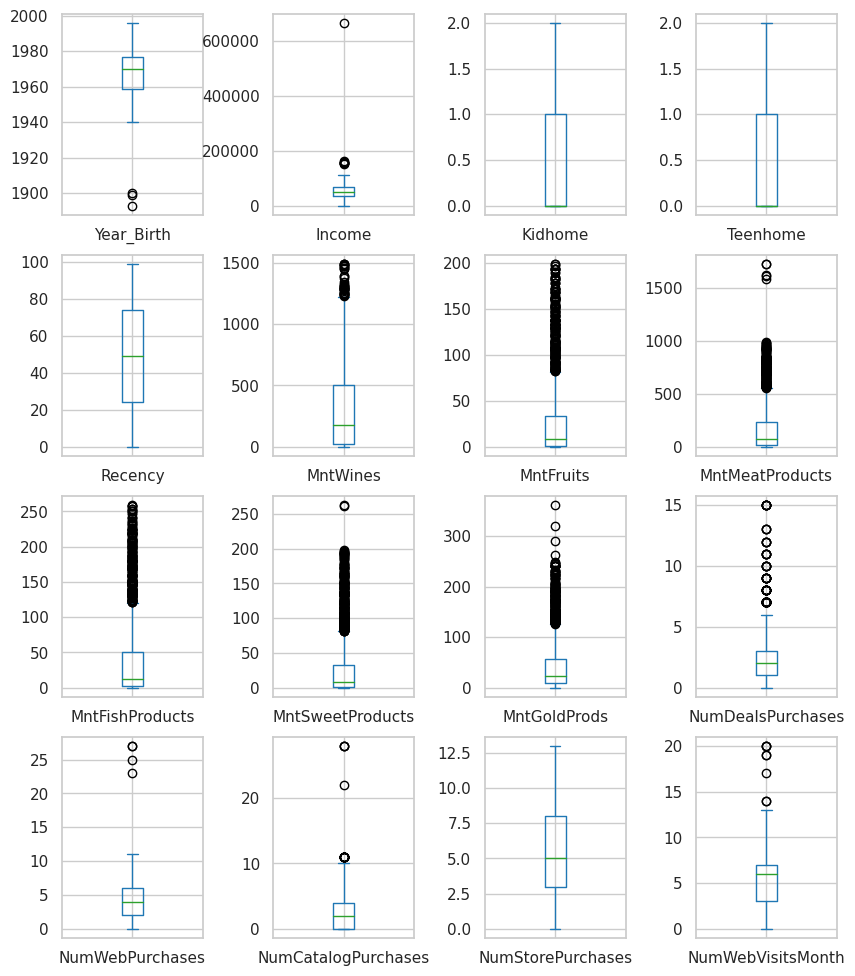

In [ ]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(10,12))
plt.subplots_adjust(wspace=0.5);

#### **Mengetahui distribusi**

In [ ]:
numeric=df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

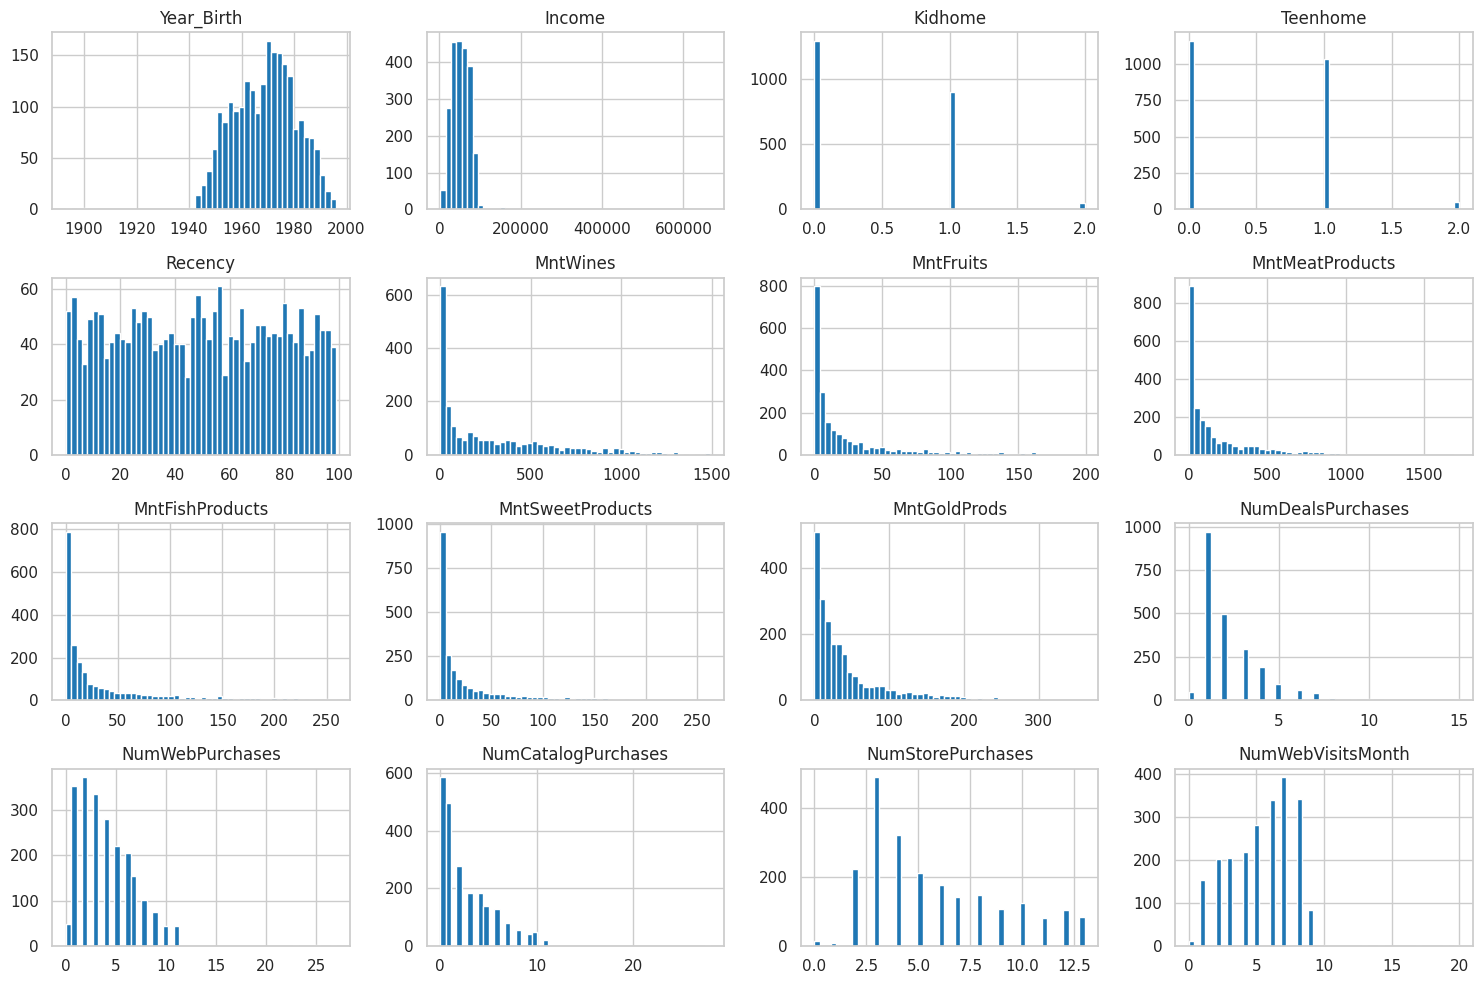

In [ ]:
fig=plt.figure(figsize=(15,10))
ax=plt.gca()
df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

## **2. Data Insight**

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### **a. Customer_Age**

<Axes: xlabel='Customer_Age', ylabel='Count'>

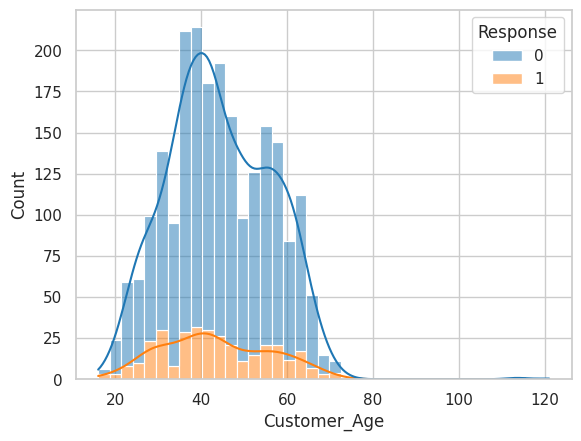

In [ ]:
df['Customer_Age']=df['Dt_Customer'].dt.year-df['Year_Birth']
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

### **b. Education**

In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

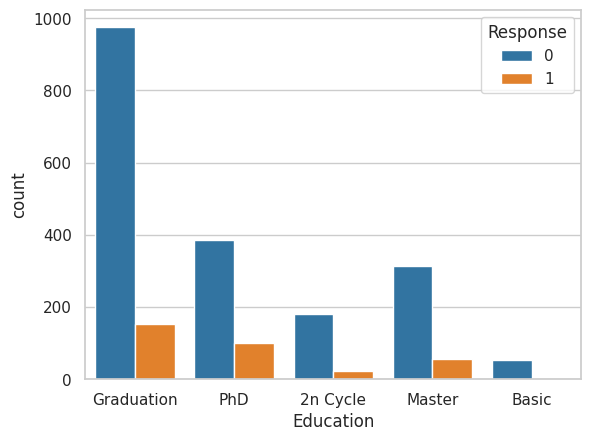

In [ ]:
ax=sns.countplot(data=df, x='Education', hue='Response')

In [ ]:
def barPerc(df,xVar,ax):

    numX=len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches

    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

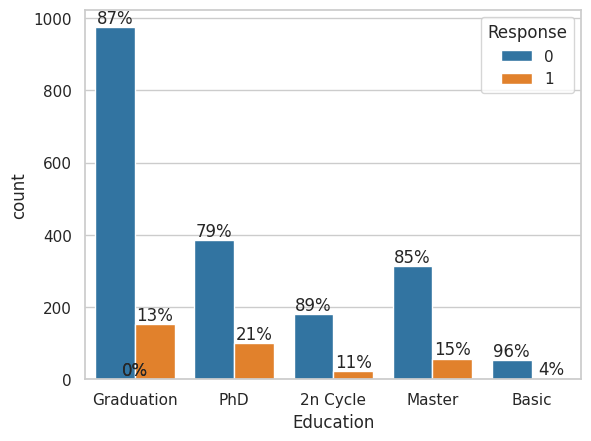

In [ ]:
ax=sns.countplot(data=df, x='Education', hue='Response')
barPerc(df, 'Education', ax)

(0.0, 175000.0)

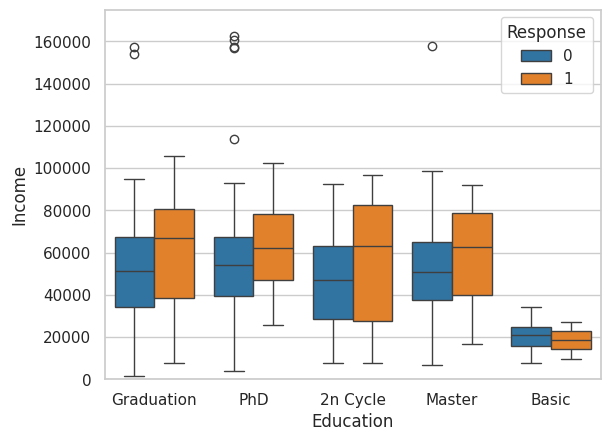

In [ ]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

### **c. Marital_Status**

In [ ]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

#### **Menggabungkan Marital_Status yang serupa**

In [ ]:
df['Marital_Status']=df['Marital_Status'].apply(lambda x:'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

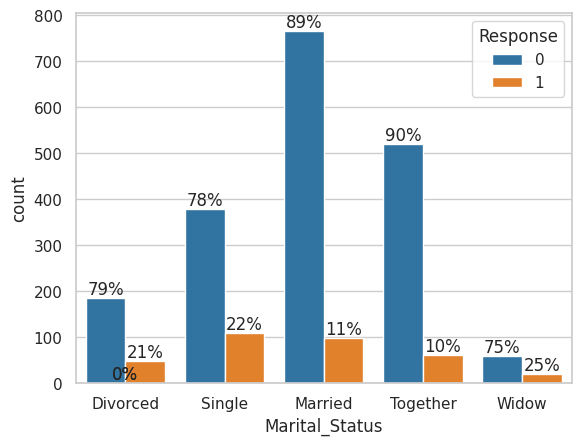

In [ ]:
ax=sns.countplot(data=df, x='Marital_Status', hue='Response')
barPerc(df,'Marital_Status', ax)

###**d. Kidhome + Teenhome**

#### **Menggabungkan Kidhome dan Teenhome menjadi Num_Dependants**

In [ ]:
df['Num_Dependants']=df['Kidhome']+df['Teenhome']

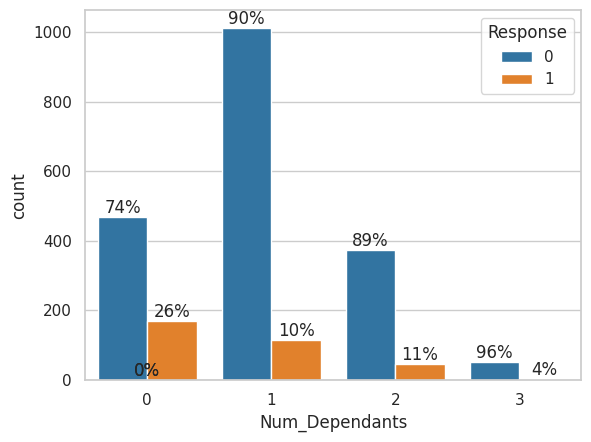

In [ ]:
ax=sns.countplot(data=df, x='Num_Dependants', hue='Response')
barPerc(df,'Num_Dependants', ax)

### **e. Customer Join Date**

In [ ]:
df['Dt_Customer_Month']=df['Dt_Customer'].dt.month
df['Dt_Customer_Year']=df['Dt_Customer'].dt.year

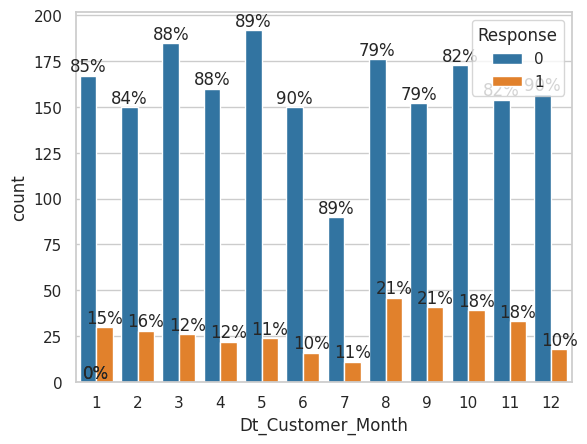

In [ ]:
ax=sns.countplot(data=df, x='Dt_Customer_Month', hue='Response')
barPerc(df, 'Dt_Customer_Month', ax)

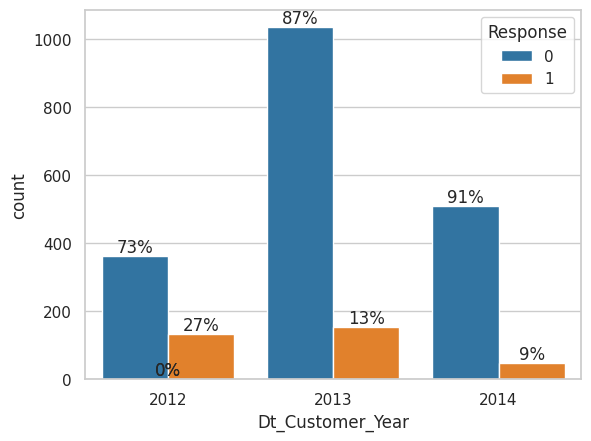

In [ ]:
ax=sns.countplot(data=df, x='Dt_Customer_Year', hue='Response')
barPerc(df, 'Dt_Customer_Year', ax)

### **f. Recency**

<Axes: xlabel='Recency', ylabel='Count'>

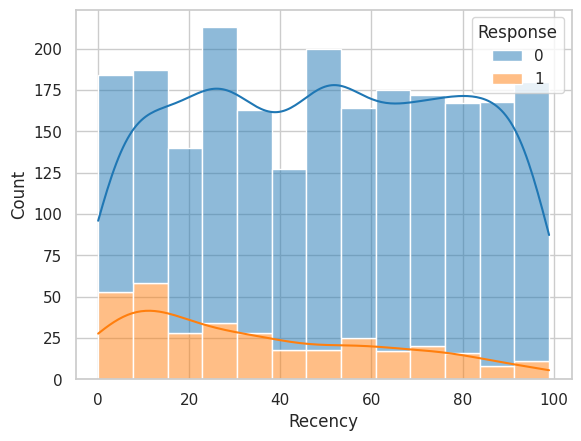

In [ ]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

### **g. Amount Spend**

In [ ]:
amt_spent_features=[ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [ ]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247254
MntMeatProducts,0.236335
MntGoldProds,0.139850
MntFruits,0.125289
MntSweetProducts,0.117372
MntFishProducts,0.111331


#### **Menggabungkan semua Mnt dan mengetahui korelasi dengan Response**

In [ ]:
amt_spent_features=[c for c in df.columns if 'Mnt' in str(c)]
df['Total_Amount_Spent']=df[amt_spent_features].sum(axis=1)

<Axes: xlabel='Total_Amount_Spent', ylabel='Count'>

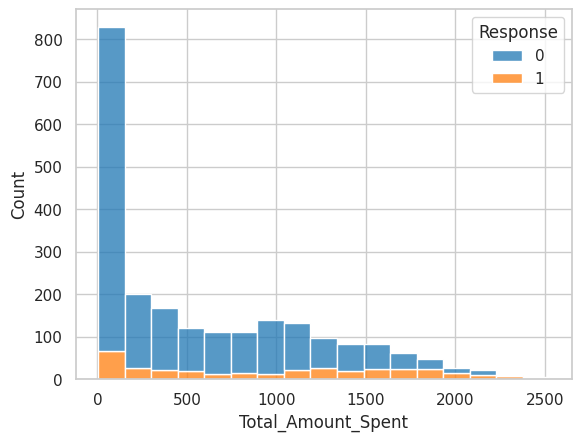

In [ ]:
sns.histplot(data=df, x='Total_Amount_Spent', hue='Response', multiple='stack', kde=False)

### **h. Number Purchase**

In [ ]:
purchase_features=[c for c in df.columns if 'Purchase' in str(c)]
purchase_features.append('Response')

In [ ]:
df[purchase_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220810
NumWebPurchases,0.148730
NumStorePurchases,0.039363
NumDealsPurchases,0.002238


#### **Menggabungkan semua Purchase dan mengetahui korelasi dengan Response**

In [ ]:
purchase_features=[c for c in df.columns if 'Purchase' in str(c)]
purchase_features.append('Response')

In [ ]:
df['Total_Purchases']=df[purchase_features].sum(axis=1)

<Axes: xlabel='Total_Purchases', ylabel='Count'>

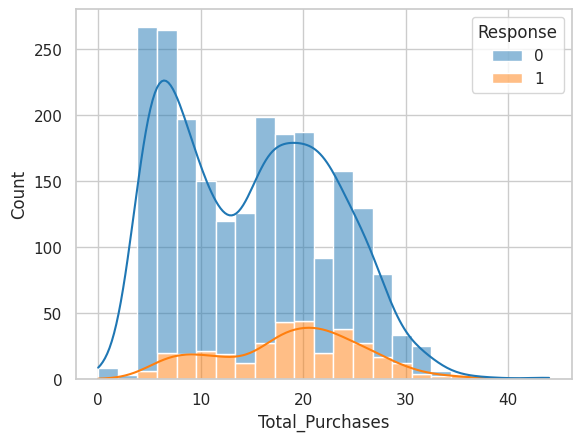

In [ ]:
sns.histplot(data=df, x='Total_Purchases', hue='Response', multiple='stack', kde=True)

### **i. NumWebVisitsMonth**

In [ ]:
df[['NumWebVisitsMonth','Response']].corr()[['Response']]

,Response
NumWebVisitsMonth,-0.003987
Response,1.000000


### **j. Response to Previous Campaign**

In [ ]:
prev_cmp=[c for c in df.columns if 'Cmp' in str(c)]
prev_cmp.append('Response')

In [ ]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.326634
AcceptedCmp1,0.293982
AcceptedCmp3,0.254258
AcceptedCmp4,0.177019
AcceptedCmp2,0.169293


### **k. Complain**

In [ ]:
df[['Complain','Response']].corr()[['Response']]

,Response
Complain,-0.001707
Response,1.000000


### **l. Country**

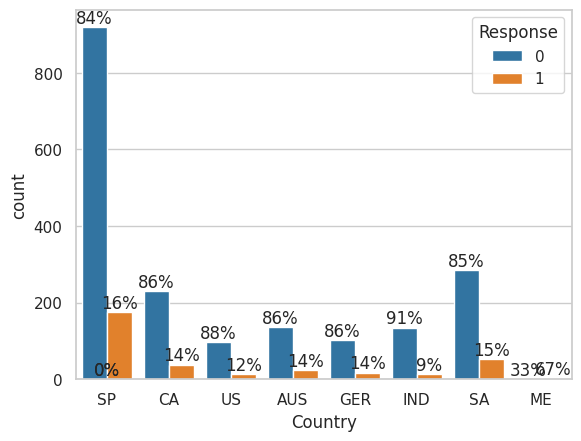

In [ ]:
ax=sns.countplot(data=df, x='Country', hue='Response')
barPerc(df,'Country', ax)

## **3. Modelling**

#### **a. Data Splitting (Data Train=60%, Data Validation=20%, Data Test=20%)**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataAnalytics/marketing_data.csv')
df.shape

(2240, 28)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
df_train, df_valid=train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [ ]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

#### **b. Preprocessing Data**

##### **Hasil data splitting yang berupa data numeric, dilakukan preprocessing**

In [ ]:
df_train.columns=df_train.columns.str.replace(' ', '')
df_valid.columns=df_valid.columns.str.replace(' ', '')
df_test.columns=df_test.columns.str.replace(' ', '')

In [ ]:
df_train['Income']=df_train['Income'].str.replace('$', '')
df_train['Income']=df_train['Income'].str.replace(',', '')
df_train['Income']=df_train['Income'].astype('float')
df_valid['Income']=df_valid['Income'].str.replace('$', '')
df_valid['Income']=df_valid['Income'].str.replace(',', '')
df_valid['Income']=df_valid['Income'].astype('float')
df_test['Income']=df_test['Income'].str.replace('$', '')
df_test['Income']=df_test['Income'].str.replace(',', '')
df_test['Income']=df_test['Income'].astype('float')

In [ ]:
df_train['Dt_Customer']=pd.to_datetime(df_train['Dt_Customer'])
df_valid['Dt_Customer']=pd.to_datetime(df_valid['Dt_Customer'])
df_test['Dt_Customer']=pd.to_datetime(df_test['Dt_Customer'])

In [ ]:
df_train['Income']=df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income']=df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income']=df_test['Income'].fillna(df_test['Income'].median())

In [ ]:
df_train=df_train[df_train['Year_Birth']>1900].reset_index(drop=True)
df_valid=df_valid[df_valid['Year_Birth']>1900].reset_index(drop=True)
df_test=df_test[df_test['Year_Birth']>1900].reset_index(drop=True)

In [ ]:
df_train['Customer_Age']=df_train['Dt_Customer'].dt.year-df['Year_Birth']
df_valid['Customer_Age']=df_valid['Dt_Customer'].dt.year-df['Year_Birth']
df_test['Customer_Age']=df_test['Dt_Customer'].dt.year-df['Year_Birth']

In [ ]:
df_train['Marital_Status']=df_train['Marital_Status'].apply(lambda x:'Single' if str (x) in ['YOLO', 'Alone', 'Absurd'] else str (x))
df_valid['Marital_Status']=df_valid['Marital_Status'].apply(lambda x:'Single' if str (x) in ['YOLO', 'Alone','Absurd'] else str (x))
df_test['Marital_Status']=df_test['Marital_Status'].apply(lambda x:'Single' if str (x) in ['YOLO', 'Alone', 'Absurd'] else str(x))

In [ ]:
df_train['Num_Dependants']=df_train['Kidhome']+df_train['Teenhome']
df_valid['Num_Dependants']=df_valid['Kidhome']+df_train['Teenhome']
df_test['Num_Dependants']=df_test['Kidhome']+df_test['Teenhome']

In [ ]:
df_train['Dt_Customer_Month']=df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year']=df_train['Dt_Customer'].dt.year
df_valid['Dt_Customer_Month']=df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year']=df_valid['Dt_Customer'].dt.year
df_test['Dt_Customer_Month']=df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year']=df_test['Dt_Customer'].dt.year

In [ ]:
amt_spent_features=[c for c in df.columns if 'Mnt' in str(c)]
df_train['Total_Amount_Spend']=df_train[amt_spent_features].sum(axis=1)
df_valid['Total_Amount_Spend']=df_valid[amt_spent_features].sum(axis=1)
df_test['Total_Amount_Spend']=df_test[amt_spent_features].sum(axis=1)

In [ ]:
purchase_features=[c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases']=df_train[purchase_features].sum(axis=1)
df_valid['Total_Purchases']=df_valid[purchase_features].sum(axis=1)
df_test['Total_Purchases']=df_test[purchase_features].sum(axis=1)
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())
print()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,44.0,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,51.0,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,55.0,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,45.0,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,24.0,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,43.0,0.0,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,53.0,2.0,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,56.0,1.0,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,45.0,1.0,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,25.0,0.0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42.0,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,51.0,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,54.0,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,47.0,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,25.0,2,6,2014,493,23


#####**Hasil preprocessing data, hanya diambil beberapa colomn numeric yang dibutuhkan**

In [ ]:
cmp_feat=[c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_feat=[c for c in df.columns if 'Mnt' in str(c)]
num_feat=[c for c in df.columns if 'Num' in str(c)]

numeric_feat=['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
              'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year', 'Total_Amount_Spend',
              'Total_Purchases']

In [ ]:
all_numeric_feat=cmp_feat+mnt_feat+num_feat+numeric_feat

In [ ]:
display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,44.0,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,51.0,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,43.0,0.0,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,53.0,2.0,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42.0,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,51.0,1,11,2012,928,14


##### **Hasil data splitting yang berupa data categoric, dilakukan preprocessing**

In [ ]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spend,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,44.0,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,51.0,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,55.0,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,45.0,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,24.0,0,3,2013,81,5


In [ ]:
categoric_feat=['Education', 'Marital_Status', 'Country']

In [ ]:
all_feat=categoric_feat+all_numeric_feat

In [ ]:
df_train_final=df_train[all_feat]
df_valid_final=df_valid[all_feat]
df_test_final=df_test[all_feat]

###### **Preprocessing data categoric (ordinal)**

In [ ]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [ ]:
education={'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [ ]:
df_train_final['Education']=df_train_final['Education'].map(education)
df_valid_final['Education']=df_valid_final['Education'].map(education)
df_test_final['Education']=df_test_final['Education'].map(education)

###### **Preprocessing data categoric (nominal)**

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv=DictVectorizer(sparse=False)

In [ ]:
df_train_final_dicts=df_train_final.to_dict(orient='records')
df_valid_final_dicts=df_valid_final.to_dict(orient='records')
df_test_final_dicts=df_test_final.to_dict(orient='records')

In [ ]:
df_train_final_dicts=dv.fit_transform(df_train_final_dicts)
df_valid_final_dicts=dv.transform(df_valid_final_dicts)
df_test_final_dicts=dv.transform(df_test_final_dicts)

In [ ]:
df_train_final=pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())
df_valid_final=pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final=pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

In [ ]:
df_train_final.head(2)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,Total_Amount_Spend,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,4.0,2014.0,5.0,71466.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,12.0,0.0,546.0,182.0,412.0,4.0,1.0,10.0,4.0,1.0,0.0,86.0,0.0,1230.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,11.0,2012.0,2.0,63684.0,0.0,0.0,1.0,0.0,0.0,0.0,208.0,80.0,80.0,428.0,93.0,575.0,4.0,3.0,8.0,8.0,5.0,1.0,61.0,1.0,1464.0,23.0


#### **c. Modelling (x=independent variable, y= dependent variable (target_variable = response))**

In [ ]:
x_train_final=df_train_final
x_valid_final=df_valid_final
x_test_final=df_test_final

In [ ]:
y_train_final=df_train.Response
y_valid_final=df_valid.Response
y_test_final=df_test.Response

###### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
model=LogisticRegression(random_state=42)
model.fit(x_train_final, y_train_final)
model.predict_proba(x_valid_final)[:, 1]
y_valid_pred=model.predict_proba(x_valid_final)[:, 1]

In [ ]:
print('Logistic Regression ROCAUC Result: ', roc_auc_score(y_valid_final, y_valid_pred).round(3))

Logistic Regression ROCAUC Result:  0.746


###### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [ ]:
y_valid_pred=model.predict_proba(x_valid_final)[:, 1]
print('Random Forest ROCAUC Result: ', roc_auc_score(y_valid_final, y_valid_pred).round(3))

Random Forest ROCAUC Result:  0.882


#### **d. Performance Stability Check**

In [ ]:
x_full_train_final=pd.concat([x_train_final, x_valid_final])
y_full_train_final=pd.concat([y_train_final, y_valid_final])

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(x_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred=model.predict_proba(x_test_final)[:, 1]
print('RandomForest ROCAUC Result: ', roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result:  0.878
